- Binary classification (Positive and Negative)
- Model used: Logistic Regression & Support Vector Machine (SVM)
- Dataset: IMBD Dataset (As of now)

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk import tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

sns.set_style(style = 'darkgrid')

In [3]:
review_df = pd.read_csv('IMDB Dataset.csv')

In [11]:
review_df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [8]:
review_df.shape

(50000, 2)

In [6]:
review_df.dtypes

review       object
sentiment    object
dtype: object

In [7]:
review_df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# Exploratory Data Analysis

In [ ]:
length = len(review_df['review'][0]) # Check length for the first review
print(f"Length of a sample review: {length}")

Length of a sample review: 1761


In [12]:
review_df['Length'] = review_df['review'].str.len()
review_df.head(10)

,review,sentiment,Length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
5,"Probably my all-time favorite movie, a story o...",positive,656
6,I sure would like to see a resurrection of a u...,positive,726
7,"This show was an amazing, fresh & innovative i...",negative,934
8,Encouraged by the positive comments about this...,negative,681
9,If you like original gut wrenching laughter yo...,positive,176


Word count: Number of words in a review

In [ ]:
word_count = review_df['review'][0].split() # Check word count for the first review
print(f"Word count in a sample review: {len(word_count)}")

Word count in a sample review: 307


In [14]:
def word_count(review_df):
    review_list = review_df.split()
    return len(review_list)

In [15]:
review_df['Word_count'] = review_df['review'].apply(word_count)
review_df.head(10)

,review,sentiment,Length,Word_count
0,One of the other reviewers has mentioned that ...,positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,926,166
3,Basically there's a family where a little boy ...,negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230
5,"Probably my all-time favorite movie, a story o...",positive,656,119
6,I sure would like to see a resurrection of a u...,positive,726,150
7,"This show was an amazing, fresh & innovative i...",negative,934,174
8,Encouraged by the positive comments about this...,negative,681,130
9,If you like original gut wrenching laughter yo...,positive,176,33


Mean word length: Average length of words

In [16]:
review_df['mean_word_length'] = review_df['review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
review_df.head(10)

,review,sentiment,Length,Word_count,mean_word_length
0,One of the other reviewers has mentioned that ...,positive,1761,307,4.739414
1,A wonderful little production. <br /><br />The...,positive,998,162,5.166667
2,I thought this was a wonderful way to spend ti...,positive,926,166,4.584337
3,Basically there's a family where a little boy ...,negative,748,138,4.427536
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,4.730435
5,"Probably my all-time favorite movie, a story o...",positive,656,119,4.521008
6,I sure would like to see a resurrection of a u...,positive,726,150,3.846667
7,"This show was an amazing, fresh & innovative i...",negative,934,174,4.373563
8,Encouraged by the positive comments about this...,negative,681,130,4.246154
9,If you like original gut wrenching laughter yo...,positive,176,33,4.363636


Mean sentence length: Average length of the sentences in the review

In [19]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(review_df['review'][0])])

np.float64(175.2)

In [20]:
review_df['mean_word_length'] = review_df['review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
review_df.head(10)

,review,sentiment,Length,Word_count,mean_word_length
0,One of the other reviewers has mentioned that ...,positive,1761,307,175.200000
1,A wonderful little production. <br /><br />The...,positive,998,162,141.714286
2,I thought this was a wonderful way to spend ti...,positive,926,166,230.750000
3,Basically there's a family where a little boy ...,negative,748,138,123.833333
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,145.444444
5,"Probably my all-time favorite movie, a story o...",positive,656,119,108.500000
6,I sure would like to see a resurrection of a u...,positive,726,150,726.000000
7,"This show was an amazing, fresh & innovative i...",negative,934,174,102.888889
8,Encouraged by the positive comments about this...,negative,681,130,96.428571
9,If you like original gut wrenching laughter yo...,positive,176,33,58.333333


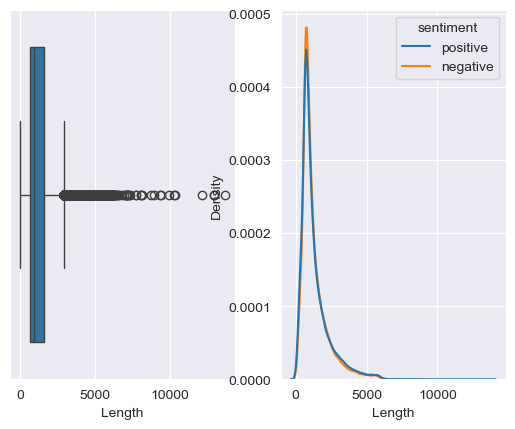

In [44]:
plt.subplot(1, 2, 1)
sns.boxplot(review_df, x = 'Length')

plt.subplot(1, 2, 2)
sns.kdeplot(review_df, x = 'Length', hue = 'sentiment')

plt.show()